# Aufgabe 2

In [4]:
# Aufgabe 2 Teil a)
import matplotlib.pyplot
import numpy
import math
def dividierte_differenzen(xs, ys):
    xs, ys = numpy.asarray(xs), numpy.asarray(ys)
    assert xs.shape == ys.shape
    dd = numpy.zeros((xs.shape[0], xs.shape[0]))
    dd[:, 0] = ys
    for i in range(1, xs.shape[0]):
        dd[i:, i] = (dd[i:, i-1] - dd[i-1:-1, i-1]) / (xs[i:] - xs[:-i])
    return numpy.diag(dd)


def horner_dd(dd, xs, x, i):
    dd, xs = numpy.asarray(dd), numpy.asarray(xs)
    q = numpy.full((xs.shape[0], ), numpy.nan)
    q[0] = dd[-1]
    for i in range(xs.shape[0]-2, -1, -1):
        q[-i-1] = dd[i] + (x - xs[i]) * q[-i-2]
    return q[-1]

xs, ys = [0,1,3], [3,2,6]

dd = dividierte_differenzen(xs, ys)
print(dd)
horner_dd(dd, xs, 2, dd.shape[0]-1)

[ 3. -1.  1.]


3.0

C:\Users\jan-e\AppData\Local\Temp\ipykernel_40988\3221954865.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


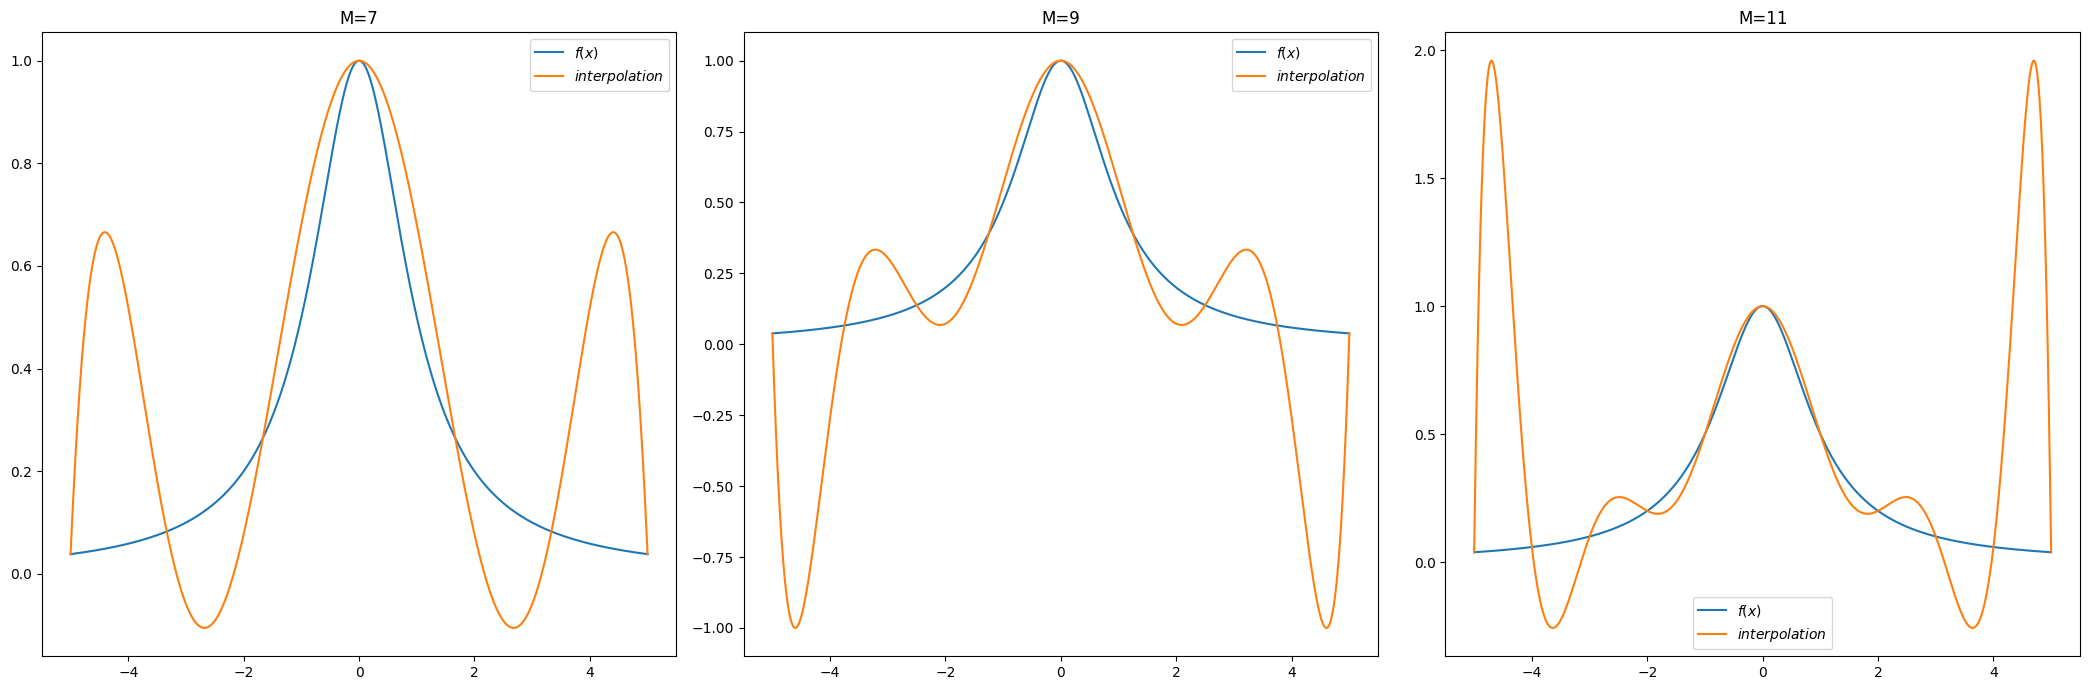

In [5]:
# Aufgabe 2 Teil b)
RES = 1000
def f(x):
    return 1/(1+x**2)

fig, axs = matplotlib.pyplot.subplots(1, 3, figsize=(21,7))
axs = axs.flatten()
for i, M in enumerate((7,9,11)):
    xs = numpy.linspace(-5, 5, M)
    ys = f(xs)
    dd = dividierte_differenzen(xs, ys)
    xs_plot = numpy.linspace(-5, 5, RES)
    ys_plot_f = f(xs_plot)
    ys_plot_ipol = numpy.zeros((RES,))
    for j in range(RES):
        ys_plot_ipol[j] = horner_dd(dd, xs, xs_plot[j], dd.shape[0]-1)
    axs[i].plot(xs_plot, ys_plot_f, label=f'$f(x)$')
    axs[i].plot(xs_plot, ys_plot_ipol, label=f'$interpolation$')
    axs[i].set_title(f'M={M}')
    axs[i].legend()
fig.tight_layout()
fig.show()

C:\Users\jan-e\AppData\Local\Temp\ipykernel_40988\3421124502.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


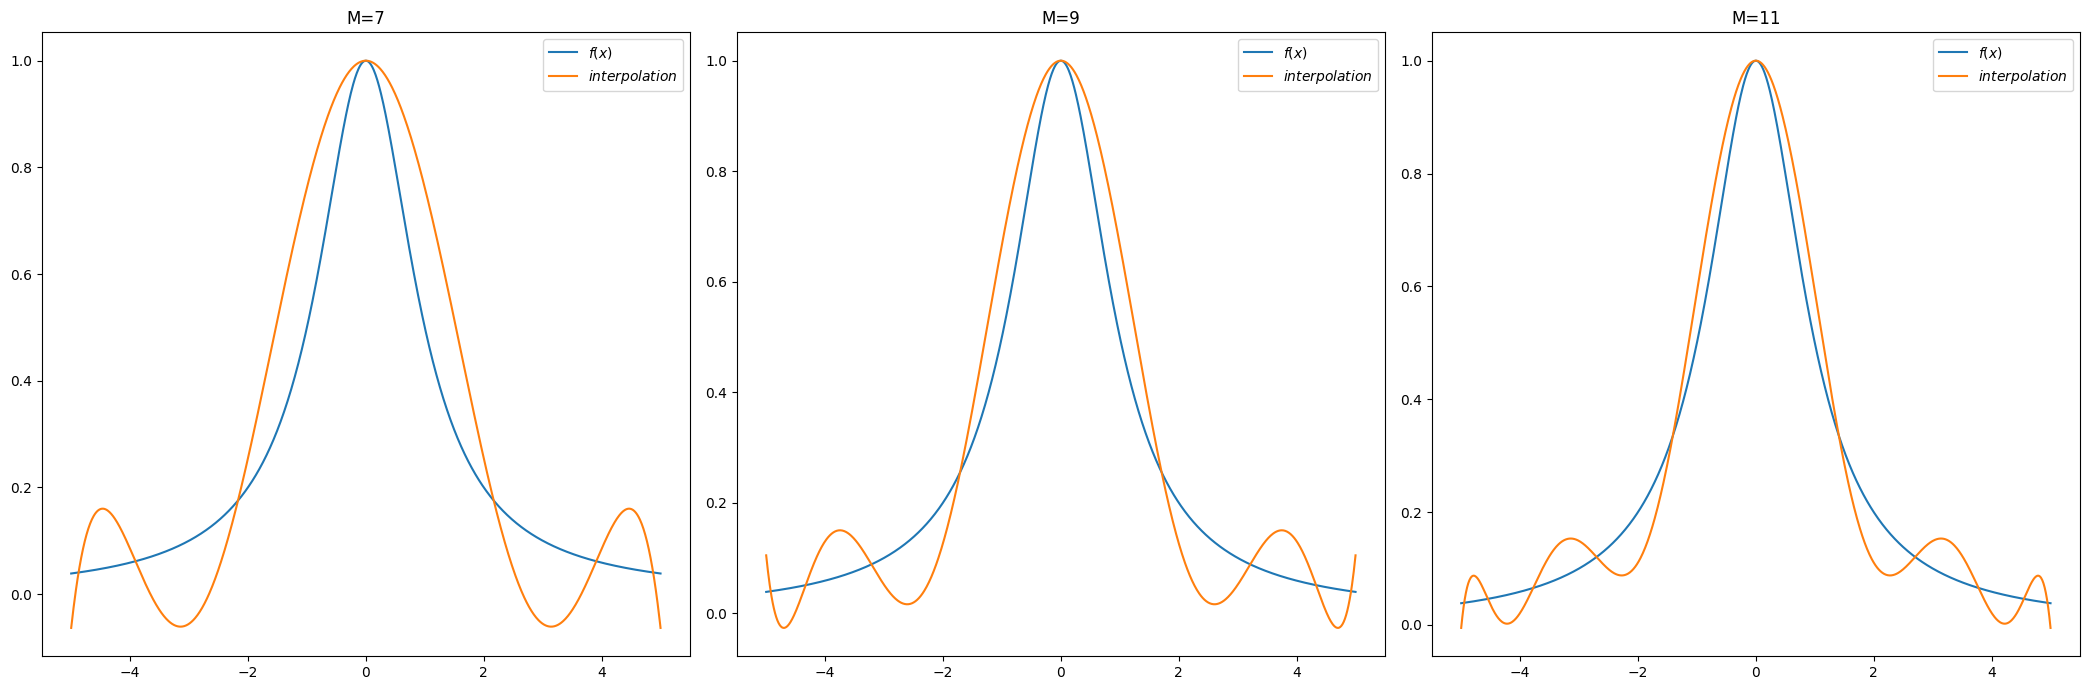

In [6]:
#c)
RES = 1000
def f(x):
    return 1/(1+x**2)

fig, axs = matplotlib.pyplot.subplots(1, 3, figsize=(21,7))
axs = axs.flatten()
for i, M in enumerate((7,9,11)):
    xs = numpy.array([-5 * math.cos(math.pi * (2*i+1) / (2*M))for i in range(M)])
    ys = f(xs)
    dd = dividierte_differenzen(xs, ys)
    xs_plot = numpy.linspace(-5, 5, RES)
    ys_plot_f = f(xs_plot)
    ys_plot_ipol = numpy.zeros((RES,))
    for j in range(RES):
        ys_plot_ipol[j] = horner_dd(dd, xs, xs_plot[j], dd.shape[0]-1)
    axs[i].plot(xs_plot, ys_plot_f, label=f'$f(x)$')
    axs[i].plot(xs_plot, ys_plot_ipol, label=f'$interpolation$')
    axs[i].set_title(f'M={M}')
    axs[i].legend()
fig.tight_layout()
fig.show()

# Aufgabe 4

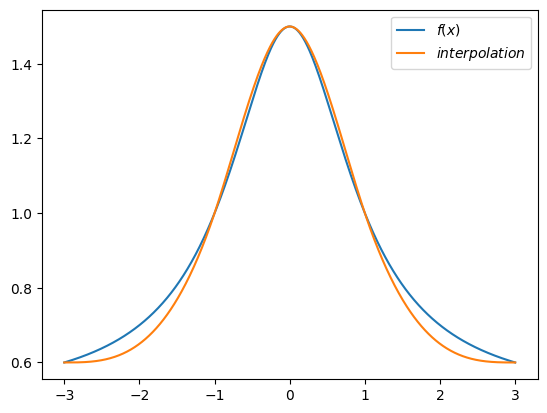

In [7]:
# Aufgabe 4 Teil a)
def splines(xs, ys):
    xs, ys = numpy.asarray(xs), numpy.asarray(ys)
    assert xs.shape == ys.shape
    h = numpy.diff(xs)
    A = numpy.diag(2 * (h[:-1] + h[1:])) + numpy.diag(h[1:-1], 1) + numpy.diag(h[1:-1], -1)
    gamma = 6 * (ys[2:] - ys[1:-1]) / h[1:] - 6 * (ys[1:-1] - ys[:-2]) / h[:-1]
    beta = numpy.zeros((xs.shape[0],))
    beta[1:-1] = numpy.linalg.solve(A, gamma)
    beta[0] = beta[-1] = 0
    alpha = (ys[1:] - ys[:-1]) / h - h * (beta[1:] + 2 * beta[:-1]) / 6
    coeffs = numpy.zeros((xs.shape[0]-1, 4))
    coeffs[:, 0] = ys[:-1]
    coeffs[:, 1] = alpha
    coeffs[:, 2] = beta[:-1]/2
    coeffs[:, 3] = (beta[1:] - beta[:-1]) / (6 * h)
    return coeffs



def horner_spline(p, xs, x):
    #Bestimmen in welchem Interval x liegt
    if x  <= xs[0]:
        return p[0, 0]
    if x >= xs[-1]:
        x = xs[-1]
    i = numpy.searchsorted(xs, x, side='left') - 1
    x = x - xs[i]
    p_i = numpy.flip(p[i])
    y = 0
    for a in p_i:
        y = a + y * x
    return y

RES = 1000

def f(x):
    return 1/(1+x**2) + 0.5


xs = numpy.array([-3,-1,0,1,3])
ys = f(xs)
p = splines(xs, ys)
xs_plot_real = numpy.linspace(-3, 3, RES)
ys_plot_real = f(xs_plot_real)
ys_plot_spline = numpy.zeros((RES,))
for i in range(RES):
    ys_plot_spline[i] = horner_spline(p, xs, xs_plot_real[i])
matplotlib.pyplot.plot(xs_plot_real, ys_plot_real, label=f'$f(x)$')
matplotlib.pyplot.plot(xs_plot_real, ys_plot_spline, label=f'$interpolation$')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

C:\Users\jan-e\AppData\Local\Temp\ipykernel_40988\2138680610.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


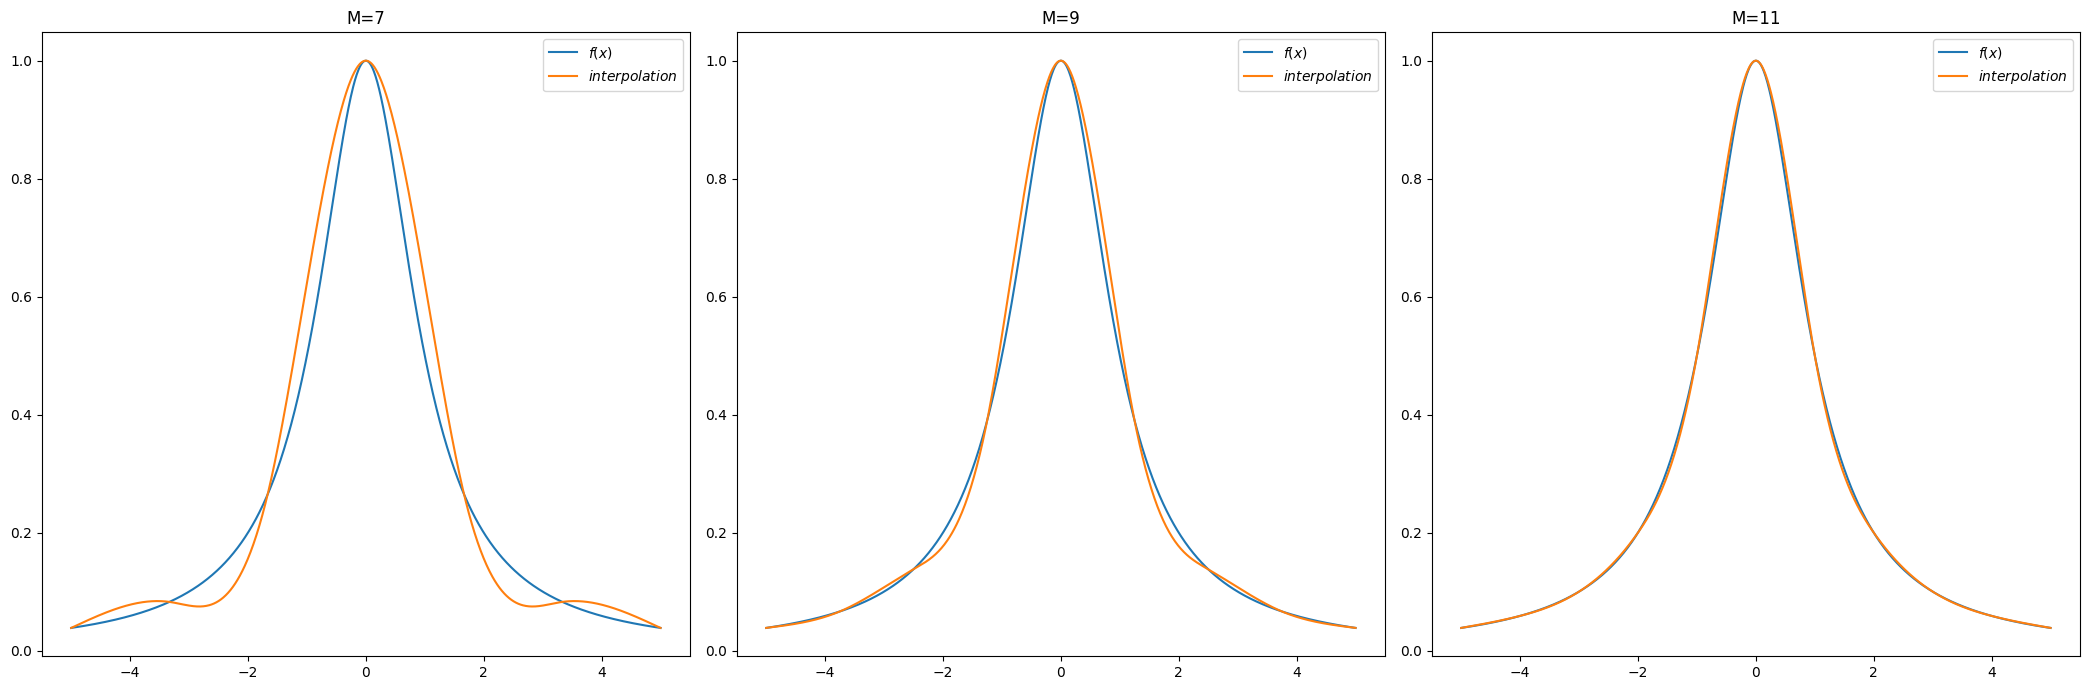

In [8]:
# Aufgabe 4 Teil b)
RES = 1000
def f(x):
    return 1/(1+x**2)

fig, axs = matplotlib.pyplot.subplots(1, 3, figsize=(21,7))
axs = axs.flatten()
for i, M in enumerate((7,9,11)):
    xs = numpy.linspace(-5, 5, M)
    ys = f(xs)
    p = splines(xs, ys)
    xs_plot_real = numpy.linspace(-5, 5, RES)
    ys_plot_real = f(xs_plot_real)
    ys_plot_spline = numpy.zeros((RES,))
    for j in range(RES):
        ys_plot_spline[j] = horner_spline(p, xs, xs_plot_real[j])
    axs[i].plot(xs_plot_real, ys_plot_real, label=f'$f(x)$')
    axs[i].plot(xs_plot_real, ys_plot_spline, label=f'$interpolation$')
    axs[i].set_title(f'M={M}')
    axs[i].legend()
fig.tight_layout()
fig.show()